# Connecting to Postgres
This notebook shows how to pass JDBC driver and connect to our Postgres

In [1]:
import findspark

findspark.add_jars('/app/postgresql-42.1.4.jar')
findspark.init()

In [2]:
from pyspark.sql import SparkSession
spark = (
    SparkSession.builder
    .appName("pyspark-postgres")
    .config("spark.driver.memory", "512m")
    .config("spark.driver.cores", "1")
    .config("spark.executor.memory", "512m")
    .config("spark.executor.cores", "1")
    .config("spark.sql.shuffle.partitions", "2")
    .getOrCreate()
)

21/11/29 03:26:02 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [3]:
df = spark.read \
    .format("jdbc") \
    .option("url", "jdbc:postgresql://postgres/workshop") \
    .option("dbtable", "workshop.weather_hourly") \
    .option("user", "workshop") \
    .option("password", "w0rkzh0p") \
    .option("driver", "org.postgresql.Driver") \
    .load()

In [4]:
df.printSchema()

root
 |-- dt: integer (nullable = true)
 |-- province: string (nullable = true)
 |-- temp: float (nullable = true)
 |-- weather_main: string (nullable = true)
 |-- weather_desc: string (nullable = true)



In [5]:
from pyspark.sql.functions import desc

In [6]:
df.groupBy('province','weather_main').count().orderBy(desc('count')).show(10)

[Stage 0:>                                                          (0 + 1) / 1]

+------------+-----+
|weather_main|count|
+------------+-----+
|       Clear|  125|
|      Clouds|   92|
|        Rain|   15|
|        Snow|    8|
+------------+-----+



In [7]:
df.groupBy('province','weather_main', 'weather_desc').count().orderBy('weather_main',desc('count')).show(10)

+----------------+------------+---------------+-----+
|        province|weather_main|   weather_desc|count|
+----------------+------------+---------------+-----+
|         CORDOBA|       Clear|    cielo claro|   45|
|        SANTA_FE|       Clear|    cielo claro|   42|
|    BUENOS_AIRES|       Clear|    cielo claro|   24|
|           JUJUY|       Clear|    cielo claro|   14|
|TIERRA_DEL_FUEGO|      Clouds|          nubes|   18|
|           JUJUY|      Clouds|          nubes|   15|
|    BUENOS_AIRES|      Clouds|     muy nuboso|    9|
|    BUENOS_AIRES|      Clouds|          nubes|    8|
|           JUJUY|      Clouds|  algo de nubes|    7|
|           JUJUY|      Clouds|nubes dispersas|    6|
+----------------+------------+---------------+-----+
only showing top 10 rows



In [8]:
from datetime import datetime
df = df.toPandas()
df['dt'] = df['dt'].apply(lambda x : datetime.fromtimestamp(x))

<AxesSubplot:xlabel='dt'>

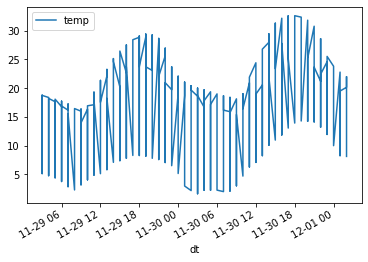

In [9]:
df.plot(x='dt')

In [10]:
spark.stop()